# Topics
* [Noise](#1)
    * [Create Noise](#1)
    * [Filter noise](#filternoise)
    * [Salt an pepper noise](#saltpepper)
* [Convolution](#2)
* [Filters as templates](#3)
* [Edge Detection](#edge_detection)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
TEST_IMAGE = 'test.jpg'

IMAGE_SHAPE = (350, 350)

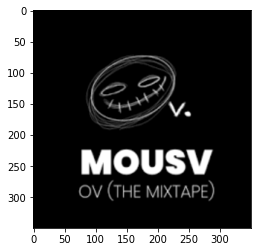

In [3]:
test_im = cv2.imread(TEST_IMAGE, cv2.COLOR_BGR2GRAY)
test_im = cv2.resize(test_im, IMAGE_SHAPE)
test_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2GRAY)

plt.imshow(test_im, cmap='gist_gray')

<a id=1></a>
# Noise:

>There are three types of noise:<br>
    1. Gaussian noise (White noise)<br>
    2. Salt - pepper - salt and pepper noise<br>
    3. Impulse noise

# Gaussian Noise
Noise have the normal distribution shape 



$$
  noise = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(z-\mu)^2}{2\sigma^2}}
$$

**noise_sigma**: hyper paramger used to control the amount of noise added to image (in the range of image scale usually(0 - 255))

Text(0.5, 1.0, 'Histogram of noise y axis')

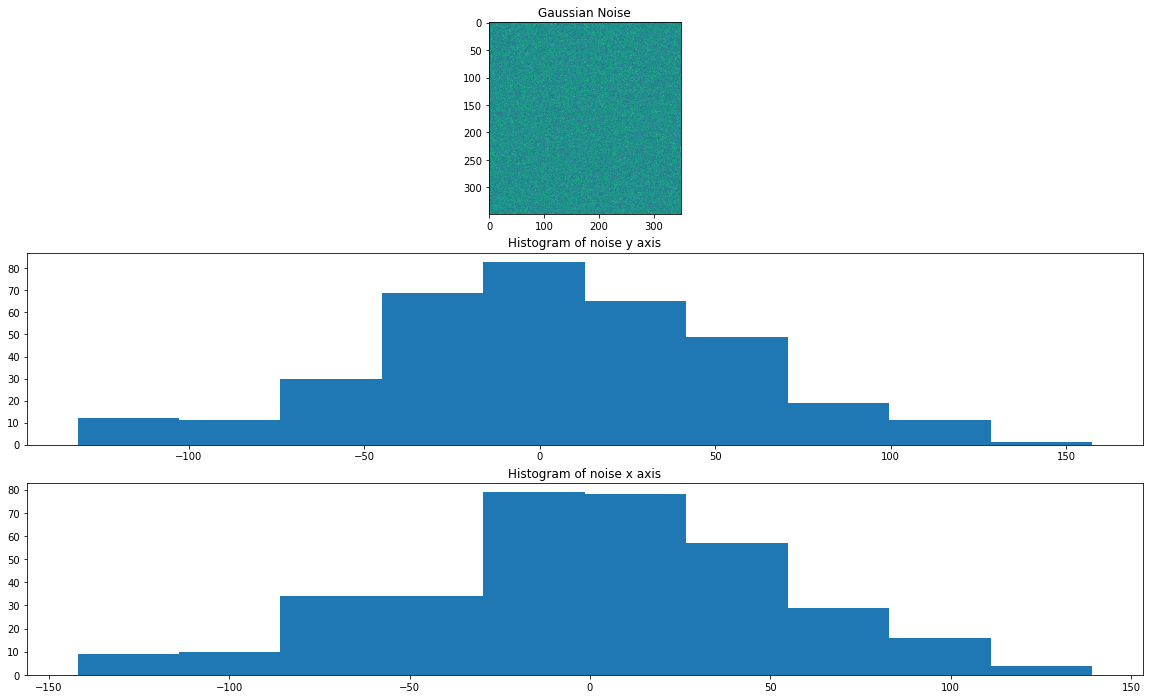

In [4]:
# Create Gaussian noise
noise_segma = 50
noise = np.random.randn(IMAGE_SHAPE[0], IMAGE_SHAPE[1]) * noise_segma

plt.figure(figsize=(20, 12))
fig = plt.subplot(3, 1, 1)
fig.imshow(noise);
fig.set_title('Gaussian Noise')

fig = plt.subplot(3, 1, 3)
fig.hist(noise[0]);
fig.set_title('Histogram of noise x axis')

fig = plt.subplot(3, 1, 2)
fig.hist(noise[1]);
fig.set_title('Histogram of noise y axis')

Text(0.5, 1.0, 'Image with noise')

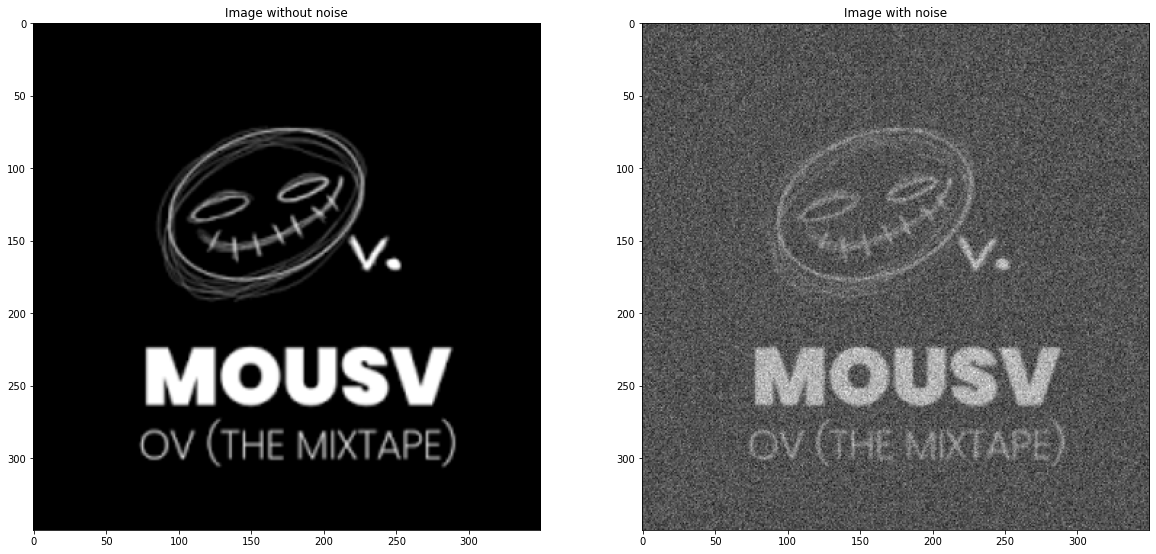

In [5]:
noised_im = np.add(test_im, noise)
plt.figure(figsize=(20, 12))

fig = plt.subplot(1, 2, 1)
fig.imshow(test_im, cmap='gist_gray');
fig.set_title('Image without noise')

fig = plt.subplot(1, 2, 2)
fig.imshow(noised_im, cmap='gist_gray');
fig.set_title('Image with noise')

<a id='filternoise'></a>
# Filter noise
<font size=3>In 1D vectors we can remove point with average points in the same region<font>

Text(0.5, 1.0, 'Image with noise')

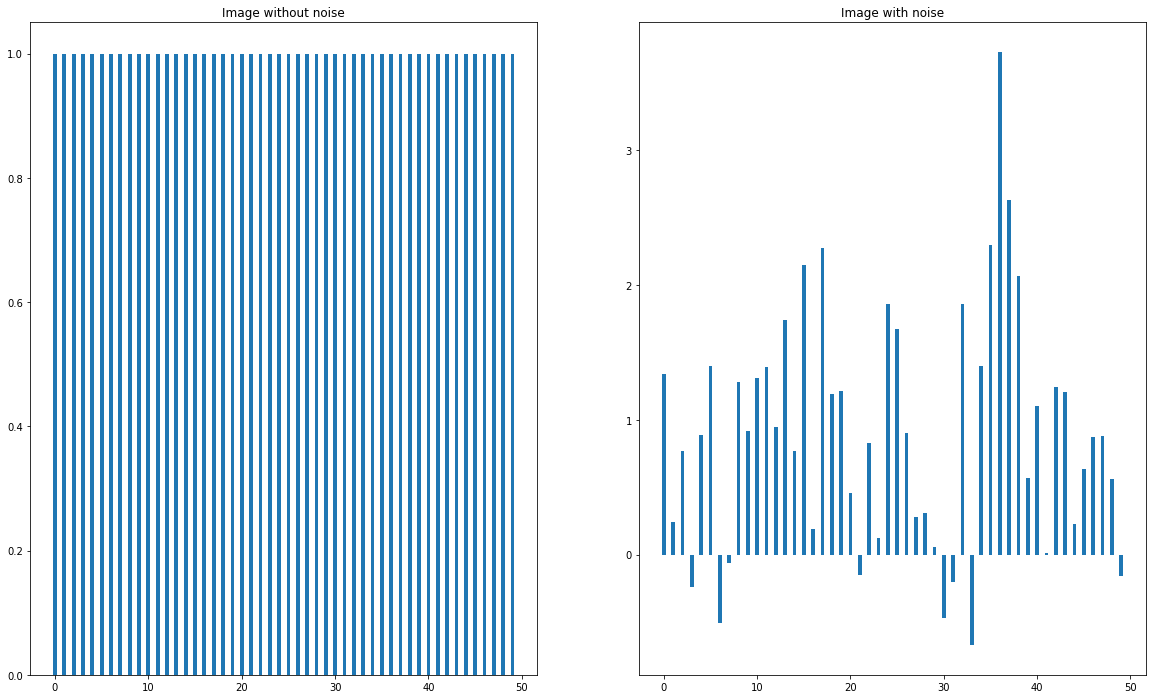

In [6]:
SIZE = 50
CONST = 1


x = np.arange(SIZE)
im_1D = np.ones(SIZE) * CONST
noise = np.random.randn(SIZE)
noised_1D = noise + im_1D

plt.figure(figsize=(20, 12)) 

fig = plt.subplot(1, 2, 1)
fig.bar(x, im_1D, width=0.4)
fig.set_title('Image without noise')

fig = plt.subplot(1, 2, 2)
fig.bar(x, noised_1D, width=0.4)
fig.set_title('Image with noise')

Text(0.5, 1.0, 'Image after removing noise')

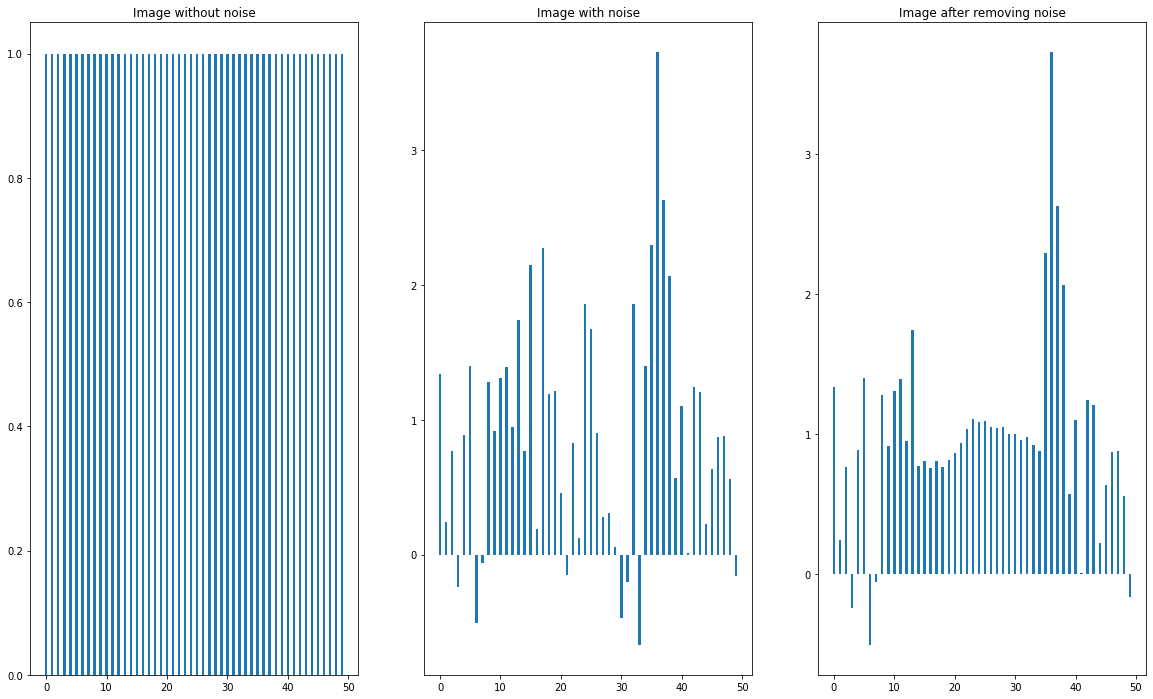

In [7]:
def average_noise_removing(noised_im, window_size:int=5):
    optimized_im = noised_im.copy()
    start_idx = window_size // 2
    end_idx = len(noised_im) - window_size // 2
    
    for i in range(start_idx, end_idx):
        optimized_im[i] = np.mean(noised_im[i-start_idx:i+start_idx+1])
    return optimized_im

optimized_1D = average_noise_removing(noised_1D, 30)

plt.figure(figsize=(20, 12)) 

fig = plt.subplot(1, 3, 1)
fig.bar(x, im_1D, width=0.4)
fig.set_title('Image without noise')

fig = plt.subplot(1, 3, 2)
fig.bar(x, noised_1D, width=0.4)
fig.set_title('Image with noise')

fig = plt.subplot(1, 3, 3)
fig.bar(x, optimized_1D, width=0.4)
fig.set_title('Image after removing noise')

Filter Noise using weigted average (pixels near to optimized pixel hage larger weights than far pixels) 

Text(0.5, 1.0, 'Image after removing noise')

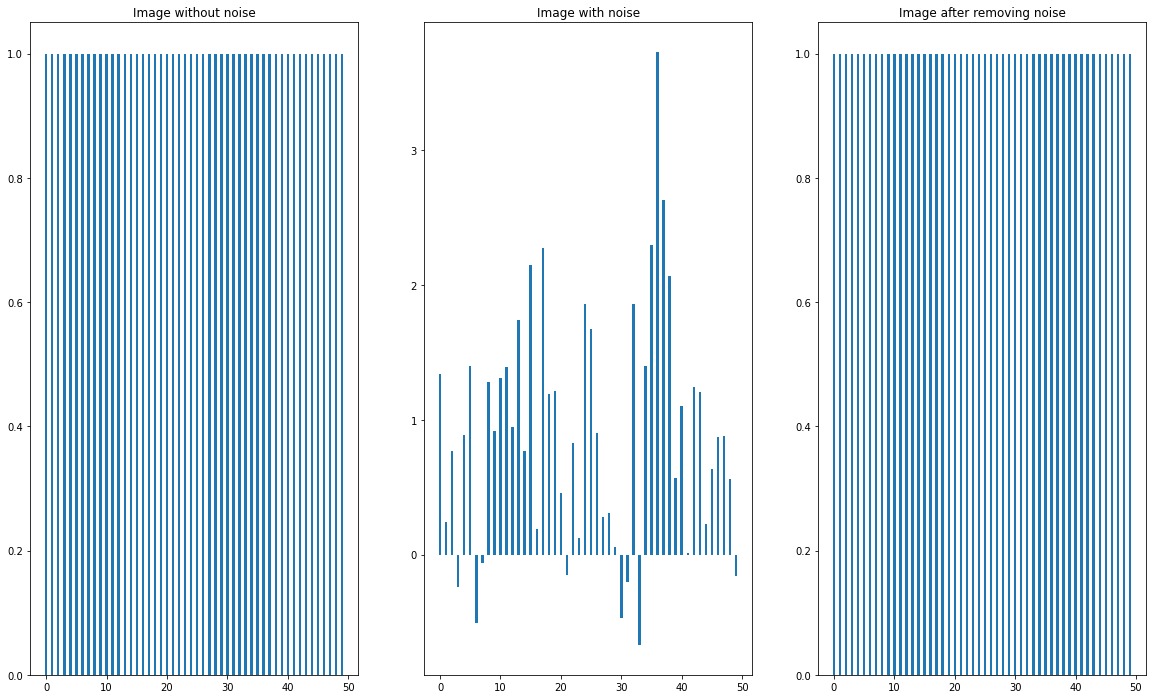

In [8]:
def weighted_mean(array, weights):
    return np.sum(array * weights) / np.sum(weights)

def weighted_average_filter(noised_im, weights, window_size:int=5):
    optimized_im = noised_im.copy()
    start_idx = window_size // 2
    end_idx = len(noised_im) - window_size // 2
    

    for i in range(start_idx, end_idx):
        optimized_im[i] = weighted_mean(noised_im[i-start_idx:i+start_idx+1], weights)
    return optimized_im


WEIGHTS = np.array([2, 4, 6, 4, 2])
optimized_1D = weighted_average_filter(im_1D, weights=WEIGHTS)

plt.figure(figsize=(20, 12)) 

fig = plt.subplot(1, 3, 1)
fig.bar(x, im_1D, width=0.4)
fig.set_title('Image without noise')

fig = plt.subplot(1, 3, 2)
fig.bar(x, noised_1D, width=0.4)
fig.set_title('Image with noise')

fig = plt.subplot(1, 3, 3)
fig.bar(x, optimized_1D, width=0.4)
fig.set_title('Image after removing noise')

# Gaussian Filters for 2D images
> Same as 1D vectors we can remove noise using two methods:<br>
     1. Average<br>
     2. Weighted average (Gaussian filter)

**First**: Using average

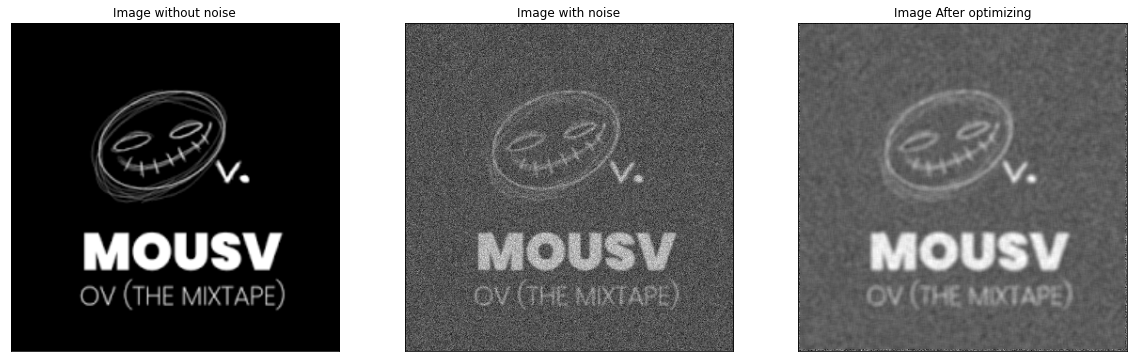

In [9]:
def average_noise_removing_2D(image, window_size:int=5):
    optimized_im = noised_im.copy()
    
    start_idx = window_size // 2
    end_idx = len(noised_im) - window_size // 2
    
    for i in range(start_idx, end_idx):
        for j in range(start_idx, end_idx):
            optimized_im[i, j] = np.mean(noised_im[i-start_idx:i+start_idx+1, j-start_idx:j+start_idx+1])
    return optimized_im
optimized_image = average_noise_removing_2D(noised_im)


plt.figure(figsize=(20, 12))

fig = plt.subplot(1, 3, 1)
fig.imshow(test_im, cmap='gist_gray');
fig.set_title('Image without noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 3, 2)
fig.imshow(noised_im, cmap='gist_gray');
fig.set_title('Image with noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 3, 3)
fig.imshow(optimized_image, cmap='gist_gray');
fig.set_title('Image After optimizing')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)


**Second**: Using weighted average

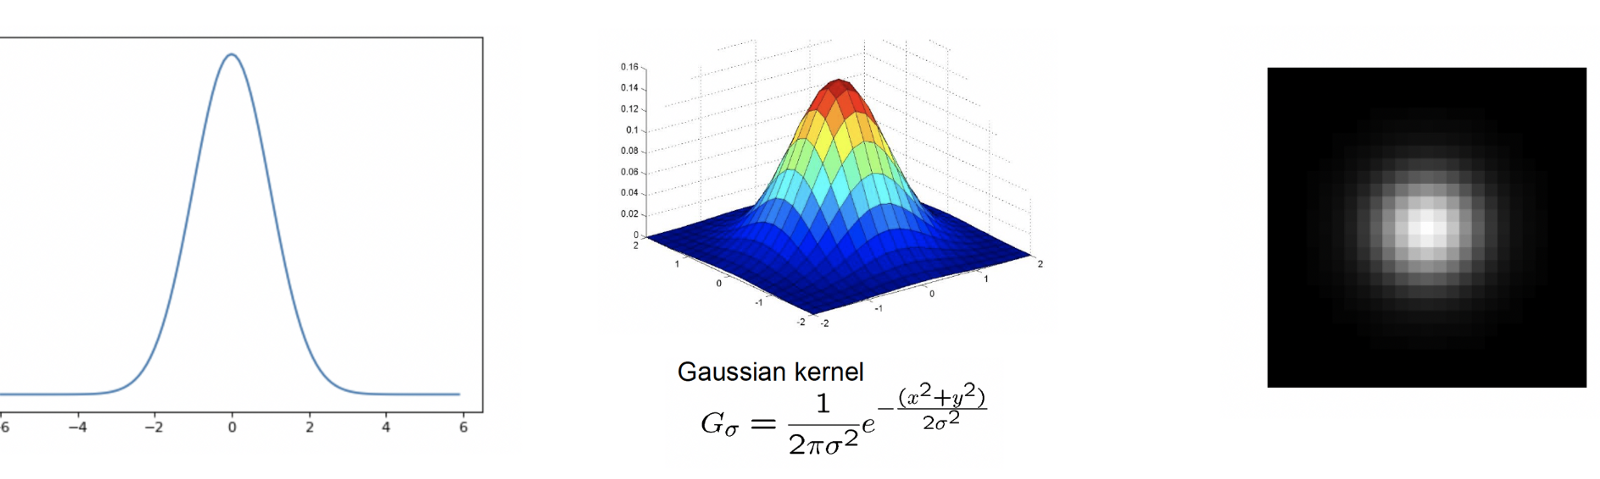

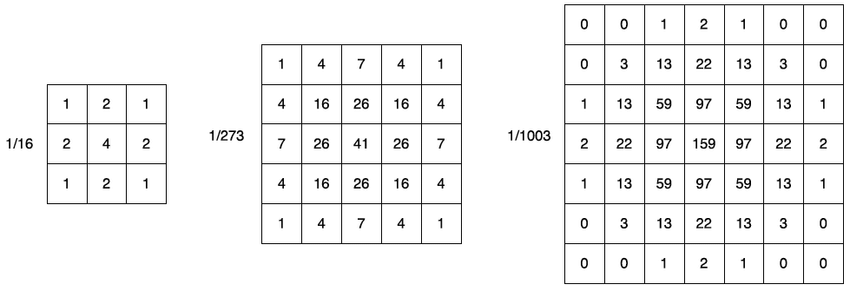

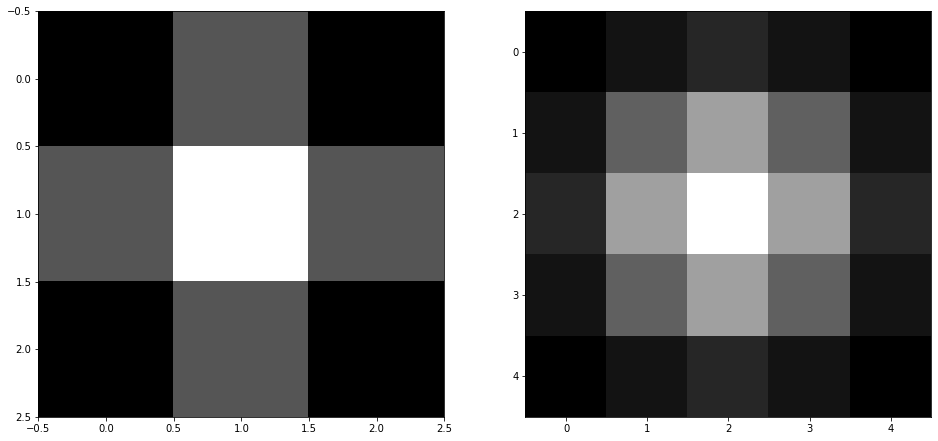

In [10]:
kernel1 = np.array([[1, 2, 1], 
                   [2, 4, 2], 
                   [1, 2, 1]])

kernel2 = np.array([[1, 4, 7, 4, 1], 
                   [4, 16, 26, 16, 4],  
                   [7, 26, 41, 26, 7], 
                   [4, 16, 26, 16, 4],
                   [1, 4, 7, 4, 1]])

plt.figure(figsize=(16, 8))
fig = plt.subplot(1, 2, 1)
fig.imshow(kernel1, cmap='gist_gray')

fig = plt.subplot(1, 2, 2)
fig.imshow(kernel2, cmap='gist_gray');

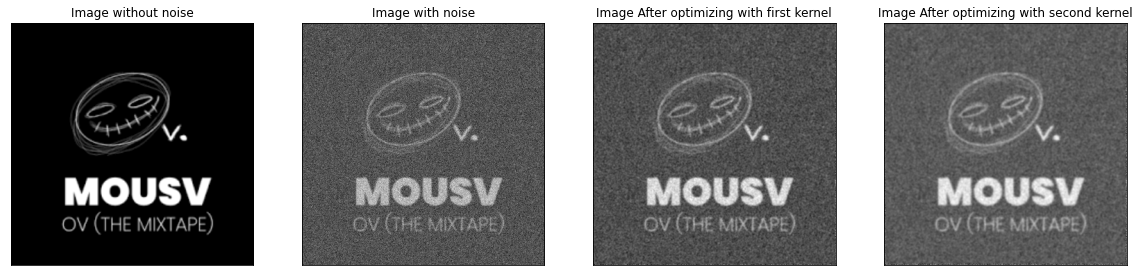

In [11]:
def weighted_average_filter_2D(noised_im:np.array, weights:np.array) -> 'blur': 
    optimized_im = noised_im.copy()
    window_size = weights.shape[0]
    
    start_idx = window_size // 2
    end_idx = len(noised_im) - window_size // 2
    
    for i in range(start_idx, end_idx):
        for j in range(start_idx, end_idx):
            optimized_im[i, j] = weighted_mean(noised_im[i-start_idx:i+start_idx+1, j-start_idx:j+start_idx+1], 
                                              weights)
    return optimized_im

optimized_image1 = weighted_average_filter_2D(noised_im, kernel1)
optimized_image2 = weighted_average_filter_2D(noised_im, kernel2)

plt.figure(figsize=(20, 12))
fig = plt.subplot(1, 4, 1)
fig.imshow(test_im, cmap='gist_gray');
fig.set_title('Image without noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 4, 2)
fig.imshow(noised_im, cmap='gist_gray');
fig.set_title('Image with noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 4, 3)
fig.imshow(optimized_image1, cmap='gist_gray');
fig.set_title('Image After optimizing with first kernel')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 4, 4)
fig.imshow(optimized_image2, cmap='gist_gray');
fig.set_title('Image After optimizing with second kernel')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

# Tips:
Using large kernel size (with larger variance and standard deviation) will enable us to get more details about further pixels(will contribute more in average calculation), so this will make optimized image more smoozy 

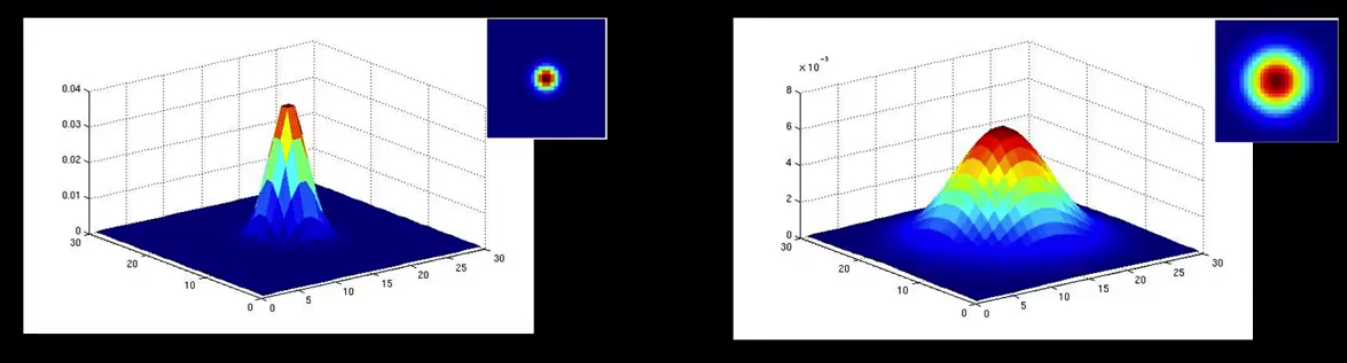

<a id='saltpepper'></a>
# Salt and pepper noise

In [12]:
FLOWER_IMAGE = 'flower.jpeg'
flower_image = cv2.imread(FLOWER_IMAGE)
flower_image = cv2.resize(flower_image, IMAGE_SHAPE)

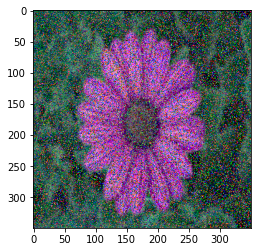

In [13]:
saltvspepper_indices = np.random.choice([0, 1, 255], p=[0.15, 0.7, 0.15], size=(350, 350, 3))
noised_image = flower_image * saltvspepper_indices
noised_image = noised_image.astype('uint8')
plt.imshow(noised_image)

In [14]:
def median_filter(im, kernel_size=5):
    out = im.copy()
    start_idx = kernel_size//2
    end_idx = im.shape[0] - kernel_size//2
    for i in range(start_idx, end_idx):
        for j in range(start_idx, end_idx):
            for k in range(3):
                out[i, j, k] = np.median(im[i-start_idx:i+start_idx+1, j-start_idx:j+start_idx+1, k])
    return out
optimized_im = median_filter(noised_image)

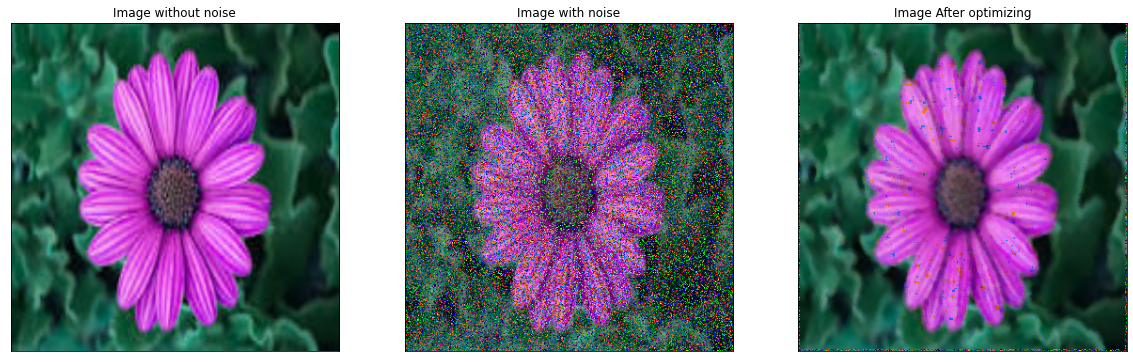

In [15]:
plt.figure(figsize=(20, 12))
fig = plt.subplot(1, 3, 1)
fig.imshow(flower_image, cmap='gist_gray');
fig.set_title('Image without noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 3, 2)
fig.imshow(noised_image, cmap='gist_gray');
fig.set_title('Image with noise')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 3, 3)
fig.imshow(optimized_im, cmap='gist_gray');
fig.set_title('Image After optimizing')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

<a id=2></a>
# Convolution

<h3 color='blue'>Difference between convolution and cross-Correlation:</h3><br>
<font color='#338F84', size=3>Cross-correlation and convolution are both operations applied to images. Cross-correlation means sliding a kernel (filter) across an image. Convolution means sliding a flipped kernel across an image. Most convolutional neural networks in machine learning libraries are actually implemented using cross-correlation, but it doesn’t change the results in practice because if convolution were used instead, the same weight values would be learned in a flipped orientation.</font>

> there are three type of convolution based on type of used padding:<br>
    1. Valid ==> filter must be applied to original image pixels.<br>
    2. same  ==> filter center is slided across all image pixels.<br>
    3. full  ==> filter is applied once any image pixel intersects with any filter element.<br>

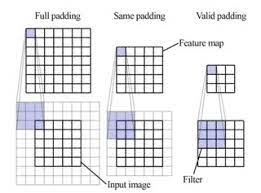

In [16]:
# cross-Correlation is same as convolution in this filter as its symmetric
filter = np.array([[255, 0, 255], 
                   [0, 255, 0], 
                   [255, 0, 255]])


def padding_with_zeros(im, padding_size:int):
    '''
    padding_size: Number of columns to add at each side
    '''
    
    # 1) make outer frame (use zeros to pade outer frame with zeros)
    outer_shape = np.add(im.shape, (padding_size*2, padding_size*2))
    newarr = np.zeros(outer_shape)
    # 2) make inner frame 
    inner_shape = newarr[padding_size:- padding_size, padding_size:- padding_size].shape
    newarr[padding_size:- padding_size, padding_size:- padding_size] = np.ones(inner_shape) * im
    
    return newarr


def convolution(signal, filter, padding:str='valid', corr=False):
    
    '''
    Signal: the input signal 
    filter: kernel used in convolution
    padding: padding type takes three values ('valid', 'same', 'full')
    corr: if False output signal will be float64 not uint8 (to show different intensities)
    '''
    
    
    filter = filter[::-1, ::-1]
    
    if padding=='valid':
        start_idx = filter.shape[0] // 2
        end_idx = signal.shape[0] - filter.shape[0] // 2
        out_shape = len(signal) - len(filter) + 1      # out_shape = M - N + 1
        out = np.random.randn(out_shape, out_shape)
        
    elif padding=='same':
        
        padding_size = len(filter) // 2
        padded_signal = padding_with_zeros(signal, padding_size)

        out = signal.copy()
        
        signal = padded_signal
        
        
    elif padding=='full':
        padding_size=len(filter) - 1
        padded_signal = padding_with_zeros(signal, padding_size)
        
        out_shape = len(signal) - len(filter) + 2 * padding_size + 1
        out = np.ones((out_shape, out_shape))
        
        signal = padded_signal
    
    start_idx = filter.shape[0] // 2
    end_idx = signal.shape[0] - filter.shape[0] // 2
    if not corr:
        out = out.astype('uint8')
    
    for i_, i in enumerate(range(start_idx, end_idx)):
        for j_, j in enumerate(range(start_idx, end_idx)):
            out_i = np.sum(filter * signal[i-start_idx:i+start_idx+1, j-start_idx:j+start_idx+1])
            out[i_, j_] =  out_i
    
    return out

valid_conv = convolution(test_im, filter)
same_conv = convolution(test_im, filter, padding='same')
full_conv = convolution(test_im, filter, padding='full')

print(f'''
          output shape of valid convoltuion: {valid_conv.shape}\n
          output shape of same convoltuion:  {same_conv.shape}\n
          output shape of full convoltuion:  {full_conv.shape}\n''')


          output shape of valid convoltuion: (348, 348)

          output shape of same convoltuion:  (350, 350)

          output shape of full convoltuion:  (352, 352)



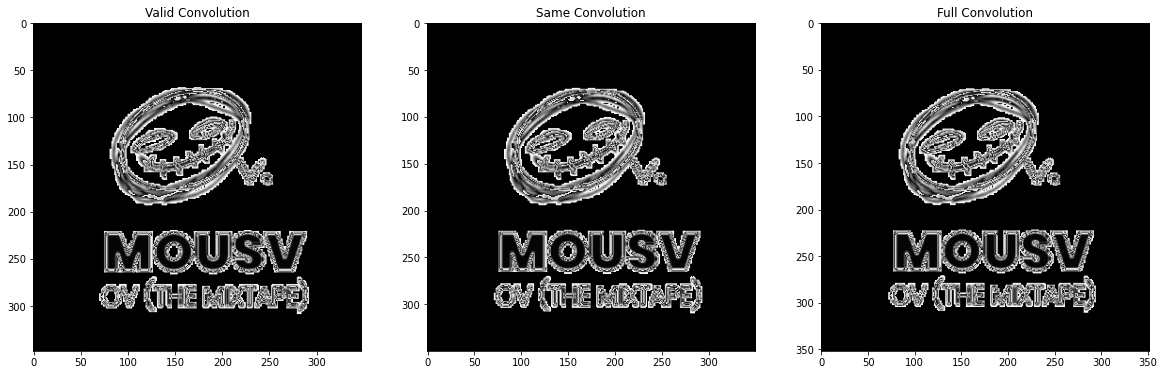

In [17]:
plt.figure(figsize=(20, 12))
fig = plt.subplot(1, 3, 1)
fig.imshow(valid_conv, cmap='gist_gray')
fig.set_title('Valid Convolution')

fig = plt.subplot(1, 3, 2)
fig.imshow(same_conv, cmap='gist_gray')
fig.set_title('Same Convolution')

fig = plt.subplot(1, 3, 3)
fig.imshow(full_conv, cmap='gist_gray')
fig.set_title('Full Convolution');

Padding methods:
1. clip filter (outer frame is black)
2. wrap around (assume image is periodic (repeated image))
3. copy edge (outer frame is same as last pixel in inner frame)
4. reflect across edge (reflect edge pixels to be the outer frame)

<a id='3'></a>
# Filter as templates (Normalized correlation)
We normalize image first to have positive and negative values (so will maximize value in case of matching)

<font size=3>First, I will discuss finding patterns in 1D</font>

In [18]:
x = [12, 223, 35, 1, 7, 250, 100, 112, 45, 89, 41, 73, 40, 12]
pattern = [45, 98, 41]

# we need function to cross slide pattern over x and dot product overlapped part of x and pattern each time
def cross_correlation_1D(im, filter):
    im = (im-np.mean(im)) / np.std(im)
    arr = np.append(np.zeros(len(pattern) - 1), im)
    arr = np.append(arr, np.zeros(len(pattern) - 1))
    for i in range(len(im)+len(pattern)-1):
        arr[i] = np.dot(pattern, arr[i:i+len(pattern)])

    return arr.argmax() + len(pattern) - 1, arr

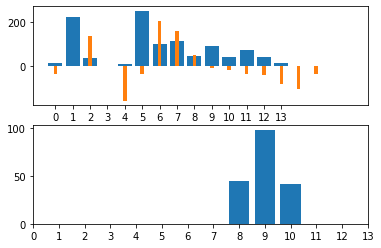

In [19]:
idx, out = cross_correlation_1D(x, filter)
fig = plt.subplot(2, 1, 1)
fig.bar(range(len(x)), x)
fig.bar(range(len(out)), out, width=0.2);
fig.set_xticks(range(len(x)))


fig = plt.subplot(2, 1, 2)
fig.bar(range(idx, idx+len(pattern)), pattern)
fig.set_xticks(range(len(x)));

<font size=3>Second, I will discuss finding patterns in 2D</font>

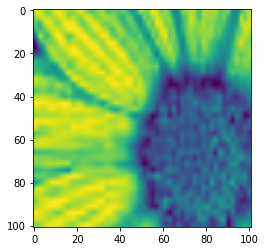

In [20]:
FLOWER_IMAGE = 'flower.jpeg'
flower_image = cv2.imread(FLOWER_IMAGE)
flower_image = cv2.resize(flower_image, IMAGE_SHAPE)

filter = flower_image[150:251, 150:251, 0]
filter = filter[::-1, ::-1] # reverse filter to return to original aspect after convolution 
plt.imshow(filter)

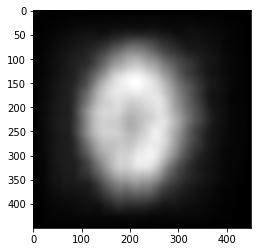

In [21]:
# normalize input photo
flower_image_normalized = (flower_image - np.mean(flower_image)) / np.std(flower_image)

# apply convolution to normalized image
correlation_map = convolution(flower_image[:, :, 0], filter[:, :], padding='full', corr=True)
plt.imshow(correlation_map, cmap='gist_gray')

In [22]:
# get arguments of max pixel in correlation map
for i in range(len(correlation_map)):
    for j in range(len(correlation_map)):
        if correlation_map[i, j] == correlation_map.max():
            break
    if correlation_map[i, j] == correlation_map.max():
        break
# get poisition of this window in original image
pt0 = (i-len(filter), j-len(filter))
pt1 = (i, j)

# draw rectangle
flower_position = cv2.rectangle(flower_image, pt0, pt1, (255, 0, 0), 2)

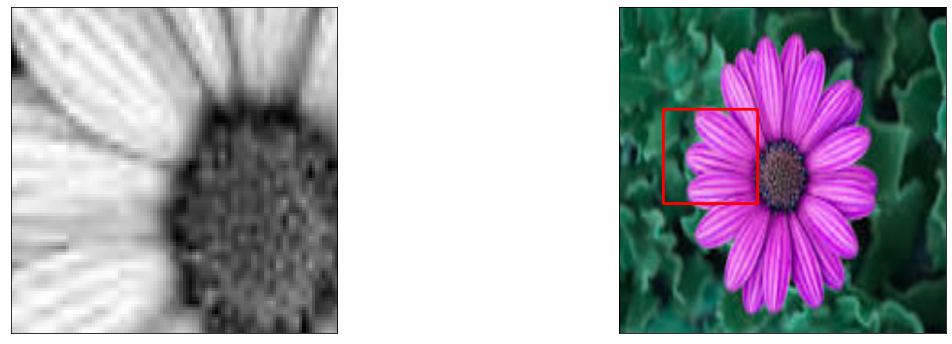

In [23]:
plt.figure(figsize=(20, 6))
fig = plt.subplot(1, 2, 1)
fig.imshow(filter, cmap='gist_gray')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

fig = plt.subplot(1, 2, 2)
fig.imshow(flower_position)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)

<a id='edge_detection'></a>
# Edge Detection

<font color='#338F84' size=3>**Types of edges**:</font>
1. surface discontinuity
2. depth discontinuity
3. surface color discontinuity
4. illumination (shadow) disconitnuity

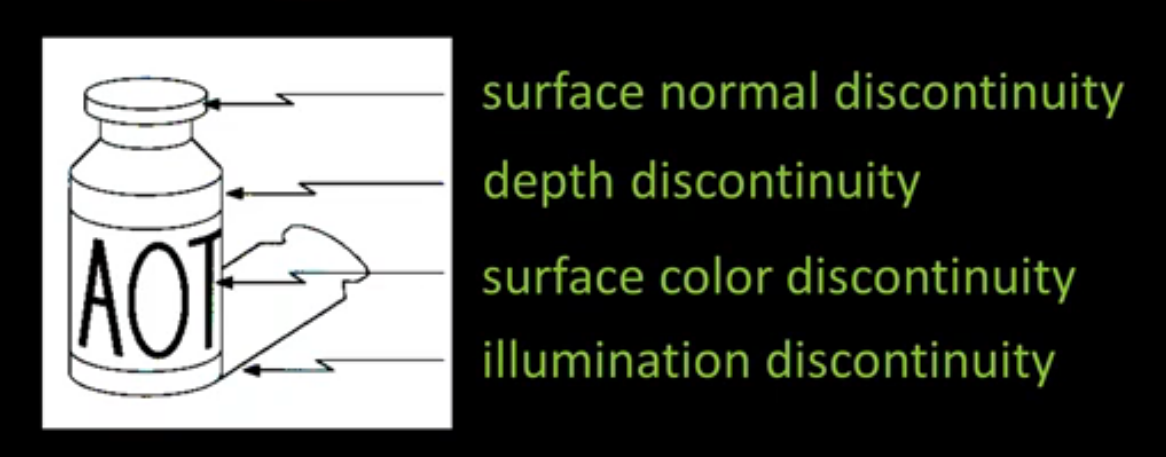

<h1><font color='#'> Edge Detection using opencv</font></h1>

There are some methods used in edge detection:
1. Sopel
2. Canny
3. shift left image - shift right image

<h4>First Sopel: </h4><br>
<font color='#338F84', size=3> The Sobel–Feldman operator is based on convolving the image with a small, separable, and integer-valued filter in the horizontal and vertical directions and is therefore relatively inexpensive in terms of computations. On the other hand, the gradient approximation that it produces is relatively crude, in particular for high-frequency variations in the image.</font>




 ${\displaystyle \mathbf {G}_{x}={\begin{bmatrix}1\\2\\1\end{bmatrix}}*\left({\begin{bmatrix}+1&0&-1\end{bmatrix}}*\mathbf {A} \right)\quad {\mbox{and}}\quad \mathbf {G} _{y}={\begin{bmatrix}+1\\0\\-1\end{bmatrix}}*\left({\begin{bmatrix}1&2&1\end{bmatrix}}*\mathbf {A} \right)}$

In this method we apply gaussian filter to the image to reduce noise in the image (noise will lead to many maximas # noise represents fast cahnges in amplitude which lead to high gradient)
\begin{bmatrix}1\\2\\1\end{bmatrix}

${G} = \sqrt{G_x^2 + G_y^2}$

$\theta = \tan({\frac{G_y}{G_x})}$

* A: The image
* $G_x$: Edges in $x$ direction
* $G_y$: Edges in $y$ direction
* $\theta$: tha direction of edge changing
* $G$: The  magnitude (Change in brightness) of edge

# Sobel Operator
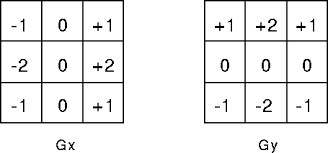

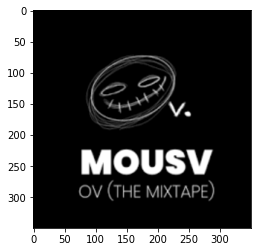

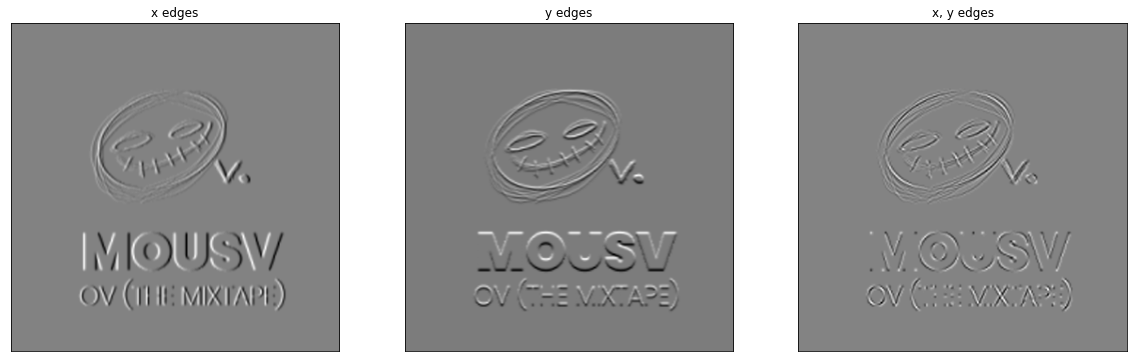

In [24]:
plt.imshow(test_im, cmap='gist_gray')
im_blur = cv2.GaussianBlur(test_im, (3, 3), 5) # sigma=5

x_derivatives = cv2.Sobel(src=test_im, ddepth=cv2.CV_16S, dx=1, dy=0) # dx=1 in x direction
y_derivatives = cv2.Sobel(src=test_im, ddepth=cv2.CV_16S, dx=0, dy=1) # dy=1 in y direction
sopel_edges = cv2.Sobel(src=test_im, ddepth=cv2.CV_16S, dx=1, dy=1)

plt.figure(figsize=(20, 12))
fig = plt.subplot(1, 3, 1)
fig.axes.xaxis.set_visible(False)
fig.set_title('x edges')
fig.axes.yaxis.set_visible(False)

fig.imshow(x_derivatives, cmap='gist_gray')


fig = plt.subplot(1, 3, 2)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
fig.set_title('y edges')
fig.imshow(y_derivatives, cmap='gist_gray')

fig = plt.subplot(1, 3, 3)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
fig.set_title('x, y edges')
fig.imshow(sopel_edges, cmap='gist_gray')

**Second** using Canny:
Steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image (same as Sobel)
3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection <br>(Find **sure-edges**: select only bold edges)
4. Apply double threshold to determine potential edges
5. Edge tracking by hysteresis

for more details:<br>
[1. wikipedia](https://en.wikipedia.org/wiki/Canny_edge_detector)<br>
[2. opencv documentations](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html) (provided with visuals)

# Low and Max threshould
Used in Hysteresis Thresholding process
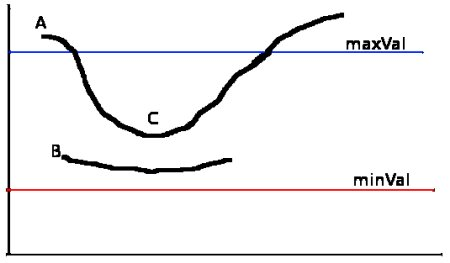

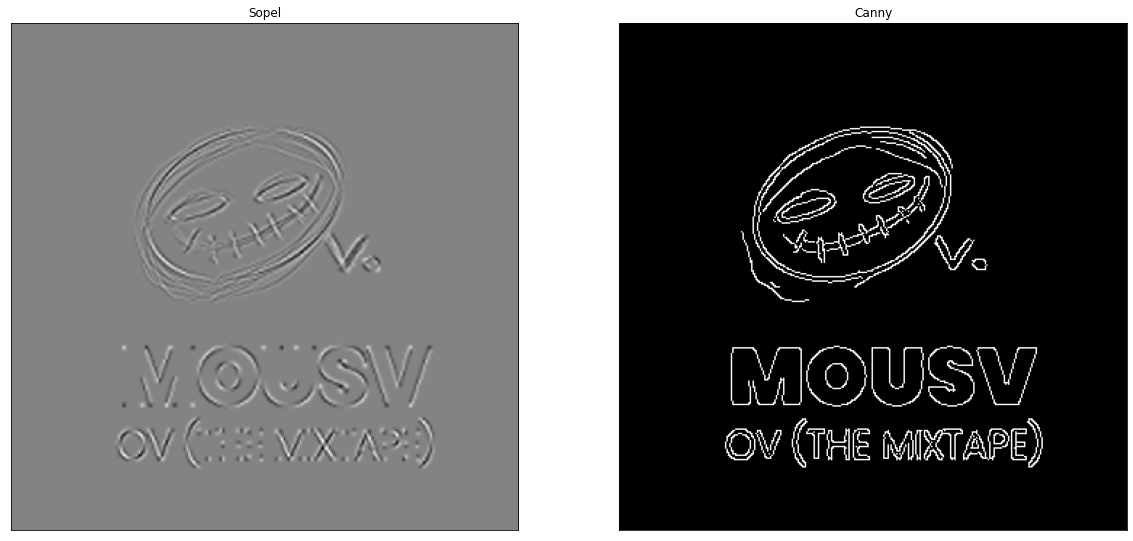

In [25]:
canny_edges = cv2.Canny(image=im_blur, threshold1=100, threshold2=60)

plt.figure(figsize=(20, 12))
fig = plt.subplot(1, 2, 1)
fig.axes.xaxis.set_visible(False)
fig.set_title('Sopel')
fig.axes.yaxis.set_visible(False)

fig.imshow(sopel_edges, cmap='gist_gray')

    
fig = plt.subplot(1, 2, 2)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
fig.set_title('Canny')
fig.imshow(canny_edges, cmap='gist_gray');